# Cystal Parameter Optimization: Objective Function Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import itertools
from sklearn.metrics import mean_squared_error

##### Load data and do light preprocessing

In [2]:
df = pd.read_csv('ss_curves.csv')

In [3]:
def preprocess(df):
    stress = np.array([df[col] for col in df.columns if "stress" in col])
    strain = np.array([df[col] for col in df.columns if "strain" in col])
    labels = ["Experimental"] + [f"Simulated {i}" for i in range(1, len(stress))]
    # Cut the excess values above and below the experimental values.
    y_min, y_max = stress[0].min(), stress[0].max()
    x_min, x_max = strain[0].min(), strain[0].max()
    return stress, strain, labels


def plot(strain, stress, label):
    plt.figure(figsize=(20,12))
    marker = itertools.cycle(('h','x',',', '+', '.', 'o', '*'))
    for x,y,label in zip(strain,stress,label):
        plt.plot(x, y, label=label, marker=next(marker))
    plt.xlim([0,0.1])
    plt.ylim([900,1100])
    plt.vlines(strain[0].max(), 0, 1100, linestyle='dotted')
    plt.legend()
    plt.show()

In [4]:
stress, strain, labels = preprocess(df)

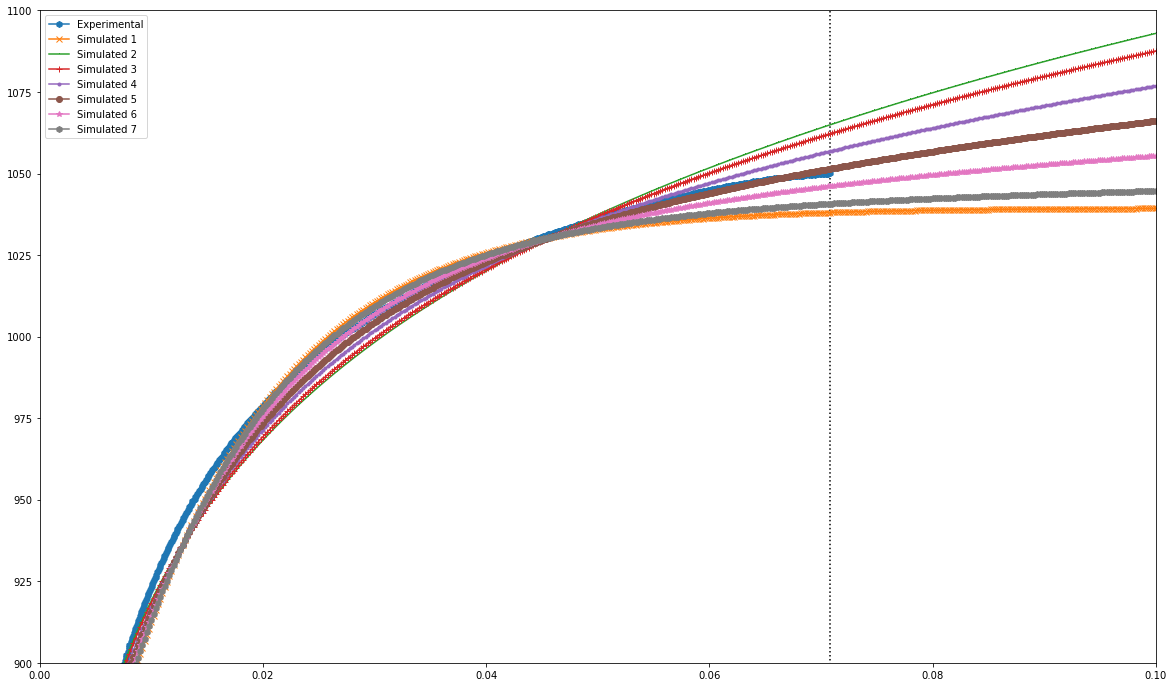

In [5]:
plot(strain, stress, labels)

#### Largest change in experimental strain is always 1.64e-4 while simulated change in strain always 2e-4

0.00016409199999999763


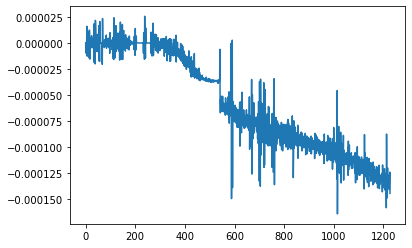

In [6]:
delta_strain= np.concatenate(([0],strain[0,:-1])) - strain[0]
plt.plot(range(len(strain[0])),delta_strain)
print(np.abs(delta_strain).max())

#### Rounding to 3 decimals would mean that we do not have to interpolate

In [7]:
exp_strain = np.around(strain[0], decimals=3)
sim_strain = np.around(strain[1], decimals=3)
max_strain = exp_strain.max()
min_strain = exp_strain.min()

In [8]:
for x in sim_strain:
    if x < max_strain:
        if x not in exp_strain:
            print("matching strain-value not found: ", x)

# Interpolating the experiment curve

In [12]:
exp_stress = stress[0]
exp_strain = strain[0]
max_strain = exp_strain.max()
min_strain = exp_strain.min()
f = interpolate.interp1d(exp_strain, exp_stress)
#f_quadratic = interpolate.interp1d(exp_strain, exp_stress, kind='quadratic')

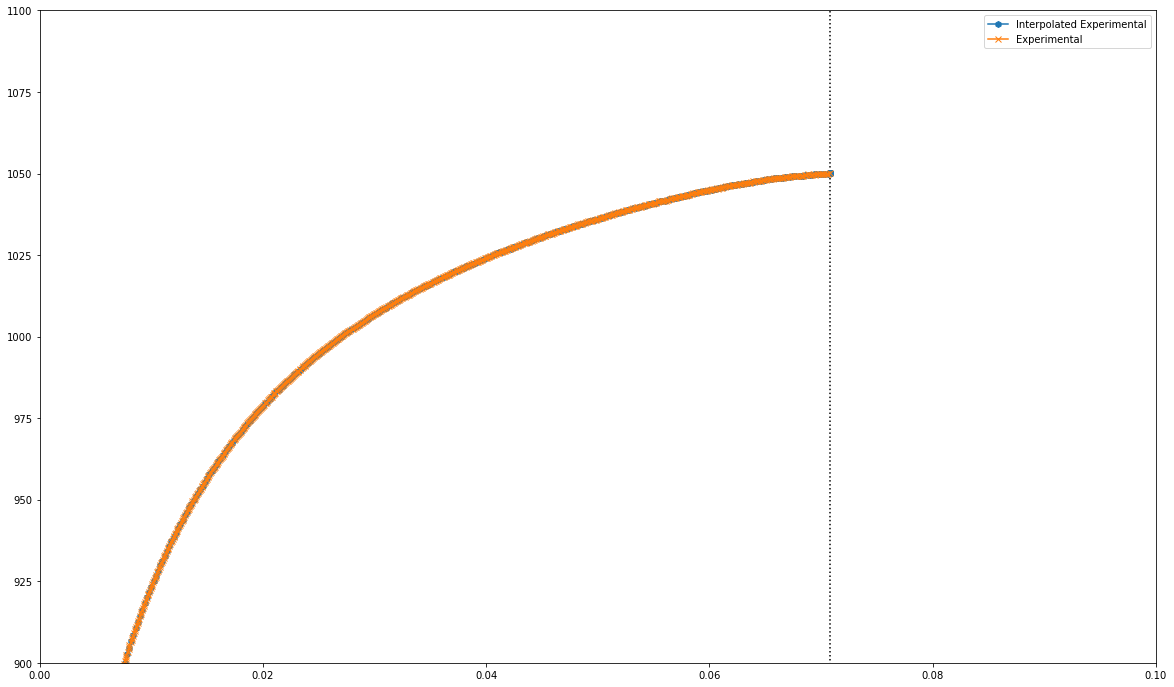

In [15]:
sim_strain = np.clip(strain[1][~np.isnan(strain[1])], a_min=min_strain, a_max=max_strain)
interpolated_stress = f(sim_strain)
#interpolated_stress_quadratic = f_quadratic(sim_strain)
plot([sim_strain, exp_strain], [interpolated_stress, exp_stress],["Interpolated Experimental", "Experimental"])

## Find the MSE of the interpolation

In [14]:
min_ind = [np.abs(exp_strain - x).argmin() for x in sim_strain]
print(mean_squared_error(exp_stress[min_ind],interpolated_stress))

3.2068475203605047


In [ ]:
# TODO: Test more interpolation functions.